<a href="https://colab.research.google.com/github/rushilgowda/AGA-lab-USN-1BM22AI111/blob/main/lab04b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

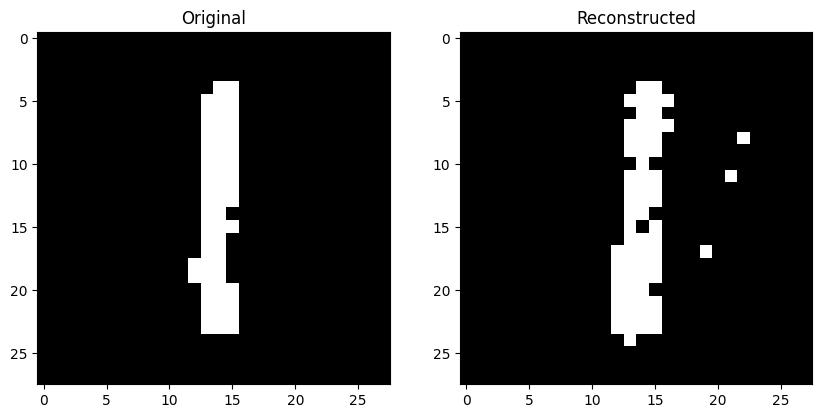

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import Binarizer

class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.1
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)

    def sample_h_given_v(self, v):
        h_prob = 1 / (1 + np.exp(-(np.dot(v, self.W) + self.b)))
        return h_prob, (h_prob > np.random.rand(*h_prob.shape)).astype(int)

    def sample_v_given_h(self, h):
        v_prob = 1 / (1 + np.exp(-(np.dot(h, self.W.T) + self.a)))
        return v_prob, (v_prob > np.random.rand(*v_prob.shape)).astype(int)

    def train(self, data, epochs=5, batch_size=100, learning_rate=0.1):
        for epoch in range(epochs):
            np.random.shuffle(data)
            for i in range(0, len(data), batch_size):
                batch = data[i:i + batch_size]
                v0 = batch
                h0_prob, h0 = self.sample_h_given_v(v0)
                v1_prob, v1 = self.sample_v_given_h(h0)
                h1_prob, h1 = self.sample_h_given_v(v1)

                positive_grad = np.dot(v0.T, h0)
                negative_grad = np.dot(v1.T, h1)

                self.W += learning_rate * (positive_grad - negative_grad) / batch_size
                self.a += learning_rate * np.mean(v0 - v1, axis=0)
                self.b += learning_rate * np.mean(h0 - h1, axis=0)

    def reconstruct(self, v):
        h_prob, h = self.sample_h_given_v(v)
        v_prob, v_reconstructed = self.sample_v_given_h(h)
        return v_reconstructed

def plot_reconstruction(original, reconstructed):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original.reshape(28, 28), cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(reconstructed.reshape(28, 28), cmap='gray')
    ax[1].set_title('Reconstructed')
    plt.show()

if __name__ == "__main__":
    mnist = fetch_openml('mnist_784', version=1, parser="auto")
    data = mnist.data.to_numpy() / 255.0

    binarizer = Binarizer(threshold=0.5)
    data = binarizer.fit_transform(data)

    rbm = RBM(n_visible=784, n_hidden=64)
    rbm.train(data, epochs=5)

    sample_idx = 0
    sample = data[sample_idx]
    reconstructed_sample = rbm.reconstruct(sample)

    plot_reconstruction(sample, reconstructed_sample)